1. Data Import and Cleaning:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gym_membership.csv")

In [2]:
df

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Female,1984-09-22,40,Standard,3,"Thu, Tue, Wed",False,NaN,20:56:00,22:42:00,106,False,NaN,False,NaN,False
996,997,Female,2008-11-19,15,Standard,3,"Fri, Mon, Sun",True,"XCore, Zumba",09:14:00,11:28:00,134,True,"orange, lemon",False,NaN,True
997,998,Male,1984-10-05,40,Standard,2,"Fri, Tue",False,NaN,17:21:00,19:53:00,152,True,"coconut_pineapple, black_currant",True,Jeffrey,True
998,999,Male,2001-02-22,23,Standard,4,"Mon, Sun, Thu, Tue",True,"HIT, XCore",10:23:00,12:29:00,126,True,berry_boost,True,Jeffrey,False


In [3]:
df.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

In [4]:
df = df.drop(['id', 'birthday', 'days_per_week', 'fav_group_lesson', 'avg_time_check_in', 'avg_time_check_out', 'fav_drink', 'name_personal_trainer'], axis=1)

In [5]:
df.isnull().sum()

,0
gender,0
Age,0
abonoment_type,0
visit_per_week,0
attend_group_lesson,0
avg_time_in_gym,0
drink_abo,0
personal_training,0
uses_sauna,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               1000 non-null   object
 1   Age                  1000 non-null   int64 
 2   abonoment_type       1000 non-null   object
 3   visit_per_week       1000 non-null   int64 
 4   attend_group_lesson  1000 non-null   bool  
 5   avg_time_in_gym      1000 non-null   int64 
 6   drink_abo            1000 non-null   bool  
 7   personal_training    1000 non-null   bool  
 8   uses_sauna           1000 non-null   bool  
dtypes: bool(4), int64(3), object(2)
memory usage: 43.1+ KB


In [7]:
df.describe()

,Age,visit_per_week,avg_time_in_gym
count,1000.000000,1000.000000,1000.000000
mean,30.604000,2.682000,105.260000
std,10.817958,1.241941,43.557177
min,12.000000,1.000000,30.000000
25%,21.000000,2.000000,67.000000
50%,30.000000,3.000000,104.000000
75%,40.000000,3.000000,143.000000
max,49.000000,5.000000,180.000000


2. Data Scaling and Visualization:

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abonoment_type'] = le.fit_transform(df['abonoment_type'])
df['gender'] = le.fit_transform(df['gender'])

In [9]:
bool_cols = ['attend_group_lesson', 'drink_abo', 'personal_training', 'uses_sauna']
df[bool_cols] = df[bool_cols].astype(int)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_cols = ['Age', 'visit_per_week', 'avg_time_in_gym']
df[cont_cols] = scaler.fit_transform(df[cont_cols])

In [11]:
df
# female: 0, male: 1
# premium: 0, standard: 1

,gender,Age,abonoment_type,visit_per_week,attend_group_lesson,avg_time_in_gym,drink_abo,personal_training,uses_sauna
0,0,-0.333316,0,1.061773,1,0.246696,0,0,1
1,0,1.516386,1,0.256179,0,-1.315252,0,1,0
2,1,0.961476,0,-1.355009,1,0.407485,1,1,0
3,1,1.238931,0,0.256179,0,-0.143791,1,1,1
4,1,1.238931,1,-0.549415,1,-1.269312,0,1,0
...,...,...,...,...,...,...,...,...,...
995,0,0.868990,1,0.256179,0,0.016998,0,0,0
996,0,-1.443138,1,0.256179,1,0.660153,1,0,1
997,1,0.868990,1,-0.549415,0,1.073609,1,1,1
998,1,-0.703257,1,1.061773,1,0.476394,1,1,0


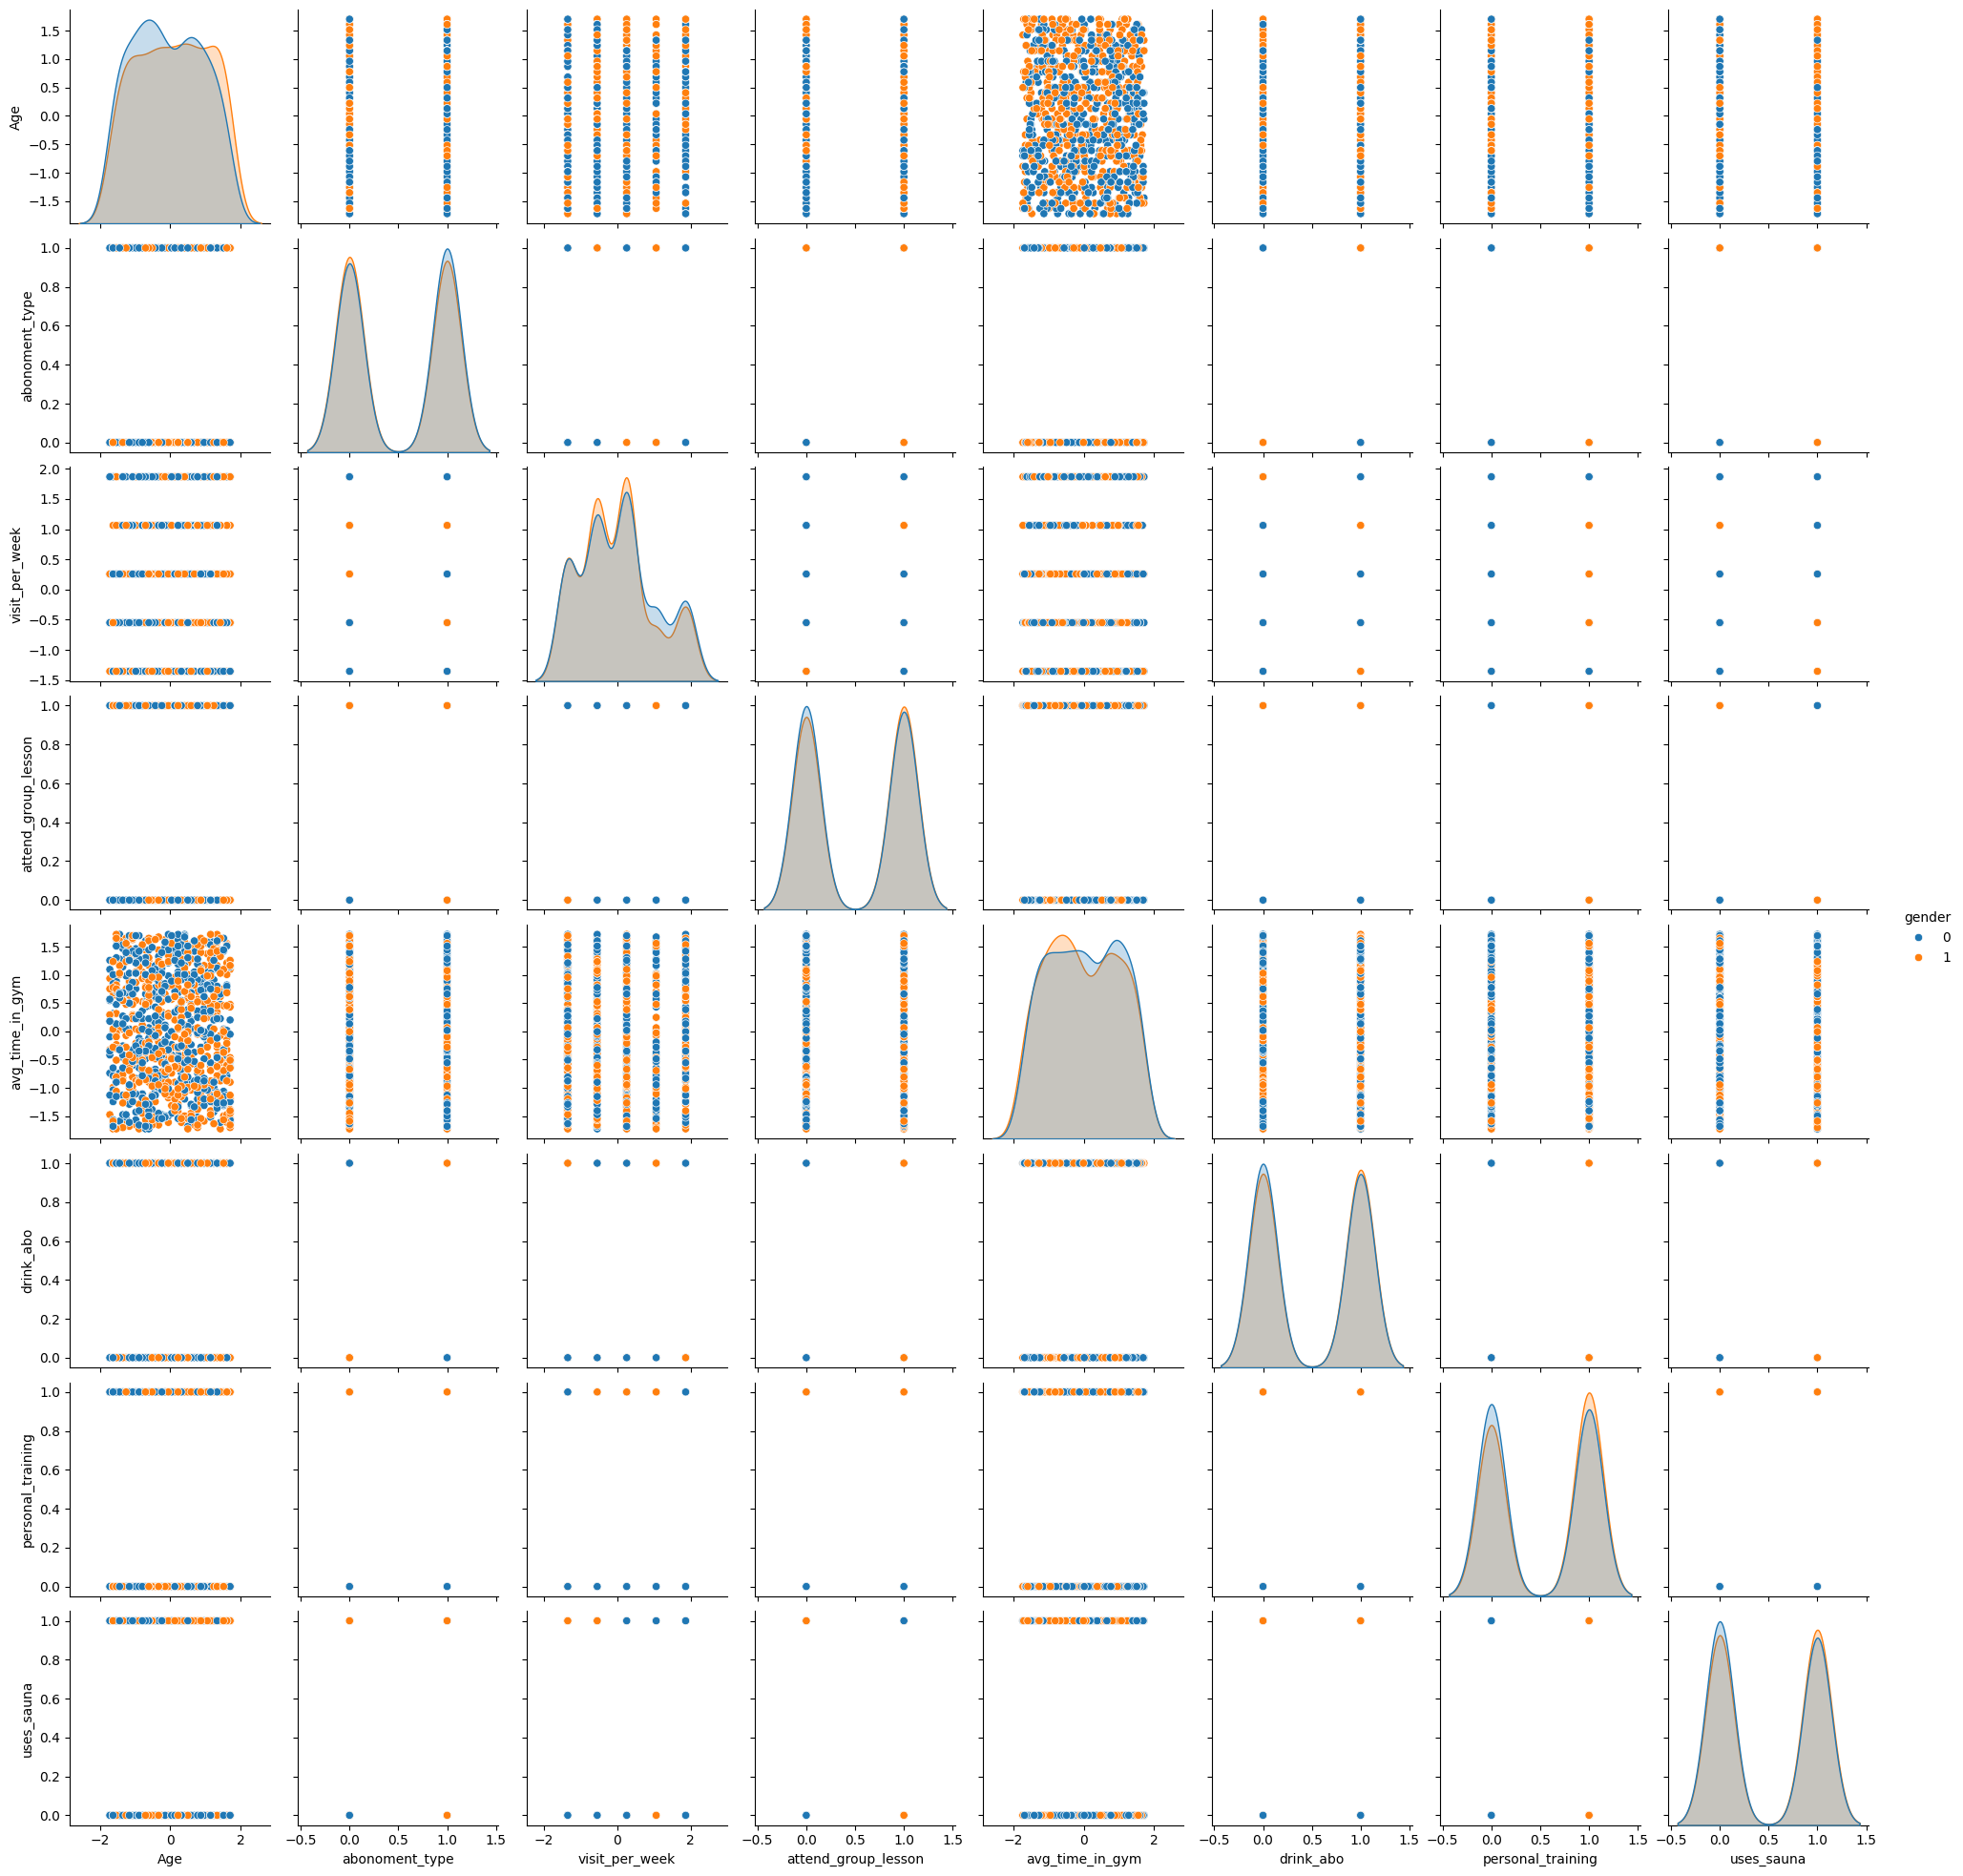

In [12]:
import seaborn as sns

sns.pairplot(df, hue='gender', diag_kind='kde')
plt.show()

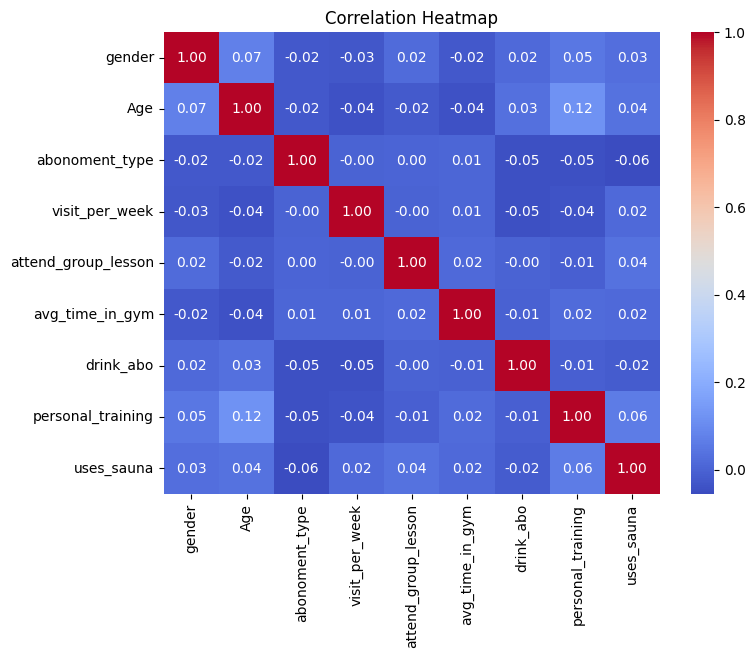

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

3. PCA Application:

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca_df = pca.fit(df)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Determine the number of components for 80-90% variance
n_components_80 = (cumulative_variance >= 0.80).argmax() + 1
n_components_90 = (cumulative_variance >= 0.90).argmax() + 1

print(f"Number of components to cover 80% variance: {n_components_80}")
print(f"Number of components to cover 90% variance: {n_components_90}")

Number of components to cover 80% variance: 6
Number of components to cover 90% variance: 8


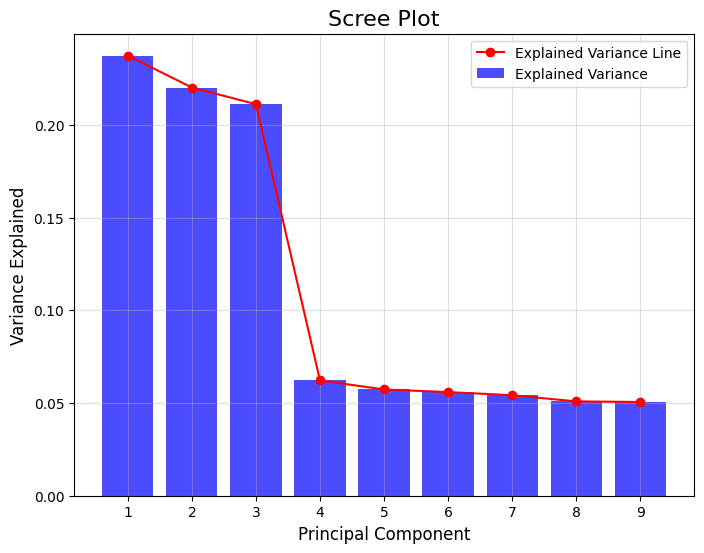

In [15]:
# Creating a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='b', label="Explained Variance")
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color='r', label="Explained Variance Line")

# Formatting the plot
plt.title("Scree Plot", fontsize=16)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Variance Explained", fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(alpha=0.4)
plt.show()

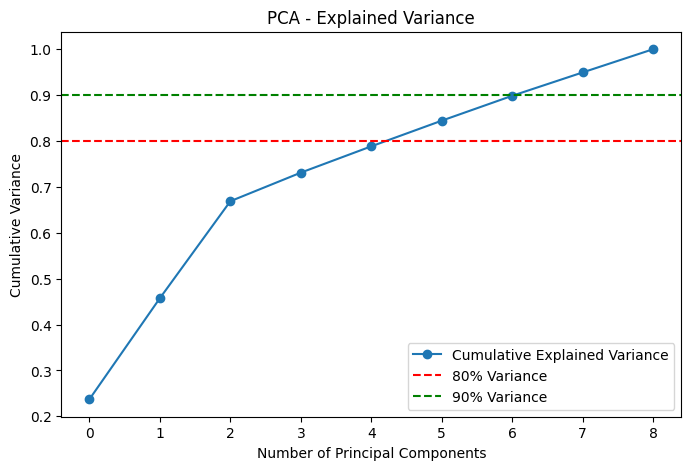

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', label="Cumulative Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--', label="80% Variance")
plt.axhline(y=0.90, color='g', linestyle='--', label="90% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.title("PCA - Explained Variance")
plt.legend()
plt.show()

In [17]:
# Transform the data to n_components_80
pca = PCA(n_components=n_components_80)
data_reduced = pca.fit_transform(df)
print(f"Reduced data shape: {data_reduced.shape}")

Reduced data shape: (1000, 6)


4. Visualization of PCA Results:

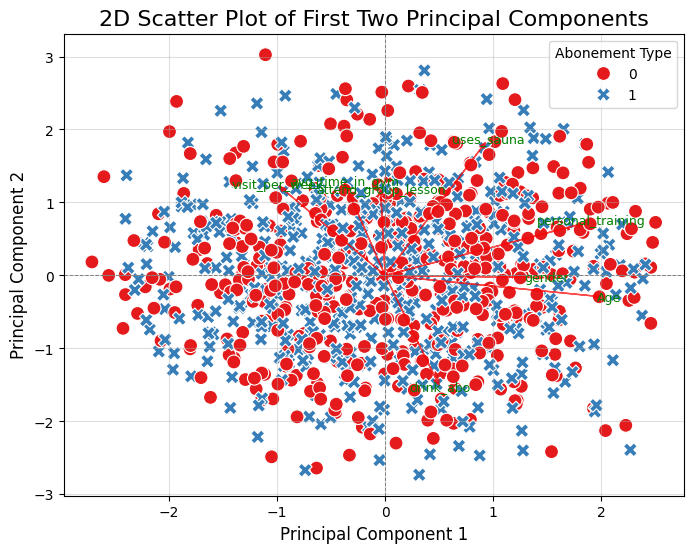

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(columns=["abonoment_type"]))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["abonoment_type"] = df["abonoment_type"]

import numpy as np
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = df.drop(columns=["abonoment_type"]).columns


# Visualize the first two principal components using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="abonoment_type",
    style="abonoment_type",
    palette="Set1",
    s=100
)

# Adding loading vectors
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='g', ha='center', va='center', fontsize=9)

# Formatting the plot
plt.title("2D Scatter Plot of First Two Principal Components", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend(title="Abonement Type", fontsize=10)
plt.grid(alpha=0.4)
plt.show()

Explanation of the First Two Principal Components:

Principal Component 1 (PC1):
PC1 often represents the direction of maximum variance in the data. Based on the loadings, it might capture a feature like overall usage patterns, such as how frequently the gym is used or how much time is spent on average in the gym. Features with high loadings along PC1 contribute strongly to this aspect.

Principal Component 2 (PC2):
PC2 is orthogonal to PC1 and represents the second highest variance. It might reflect attendance variability, such as differences in visit times or the spread of activity levels across gym visits.


Observed Patterns:

Clusters or Groupings:
The scatter plot may reveal separations between abonement types (e.g., Premium vs. Standard), indicating that these types are associated with distinct behaviors. For example, Premium users might cluster in one area of the plot, suggesting higher gym activity, while Standard users might spread out, indicating more diverse usage patterns.

Loading Vectors:
The loadings (arrows) show the contribution of the original features to each principal component. Features pointing in similar directions influence the PCs similarly and may represent correlated behaviors. Features orthogonal to each other are uncorrelated. Features with longer arrows have a stronger influence on the principal components.

Interpretation of the Principal Components:

Principal Component 1 (PC1):
Represents the direction of maximum variance in the dataset.
Based on the loadings, it could reflect general activity levels, combining multiple features such as gym visit frequency or session duration. High values along PC1 suggest members with consistently higher activity.

Principal Component 2 (PC2):
Orthogonal to PC1, representing the second-largest variance.
PC2 may capture variations in specific behaviors or preferences, such as differences in the variability of gym visits or focus on specific activities.